In [1]:
import pandas as pd
import cv2
from sklearn.model_selection import train_test_split

In [2]:
dataset_path = '/home/ketan/0.Machine_learning/0.Datasets/'
train_data = pd.read_csv(dataset_path+"Digit_Recognizer_train.csv")
test_data = pd.read_csv(dataset_path+"Digit_Recognizer_test.csv")

In [3]:
print(train_data.shape, test_data.shape)

(42000, 785) (28000, 784)


In [4]:
train_data.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [5]:
train_data['label'].unique()

array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6])

In [6]:
train_data.pixel200.unique()

array([  0, 255,  45,  25, 111, 222,  51, 150, 219, 240,  24, 254, 253,
        21,  13, 198, 137,  90, 249, 105, 157, 116,  76, 185, 138, 128,
        63, 117,  87,   5,  14,  18,   8,  22,  62,  67,  57,  81,  68,
       158,  31, 247, 193, 119, 252,  37, 223, 139,  11, 100,  94, 106,
         9, 190, 202,   4,  60, 218,  92,  28, 236, 168,  35, 169, 125,
       191, 171, 206,  32, 107, 194,  10, 122, 203, 154,   1, 245,  82,
       197, 130, 159,  77,  55,   7, 136,  43, 141, 134,  73, 248,  30,
        64,  91,   6, 126,  36, 101, 161, 109, 123,  85,  80, 221, 205,
       233,  96, 251,  42, 250, 210,  48, 181,  95, 200, 211,  19, 152,
        58, 226,  26, 166,  70, 121, 201,  56,  75,  72,   3,  41, 227,
       102, 113,  52, 118, 224, 231,  29,  86,  17, 163,  15, 244, 178,
        20, 133,  27, 220, 246, 142, 208, 184, 173, 207, 155, 215,  34,
        16, 149,  69, 129,  59,  46,   2, 230, 235,  99, 124, 151,  38,
       174, 143, 132,  79, 238,  44, 147,  89,  78, 108,  12, 12

In [7]:
features = train_data.drop("label", axis = 1)
labels = train_data["label"]

# nornalizing the data
the problem is a classification problem so we need to convert this data into something that can be feed directly to a neural network so we will normalize the data

In [8]:
def normal(dataset):
    dataset /= 255.0
    return dataset

In [9]:
features = normal(features)

We also need to convert the label dataset into something that a model can predict ie vectorising the label column

In [21]:
labels = pd.get_dummies(labels)
labels.head()

,0,1,2,3,4,5,6,7,8,9
0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0


In [22]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, random_state = 10, test_size = 0.2, shuffle = True)
print(type(x_train))

<class 'pandas.core.frame.DataFrame'>


# neural network

In [11]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

Using TensorFlow backend.
/home/ketan/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ketan/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ketan/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ketan/.local/lib/python3.6/site-packages/tensorflow/python/fra

In [23]:
model = Sequential([
    Dense(16, activation = 'relu', input_shape = (784,)),
    Dense(16, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

In [24]:
model.compile(
    optimizer = 'adam',
    loss = 'mean_squared_error',
    metrics = ['accuracy']
)

In [29]:
history = model.fit(x_train, y_train, batch_size = 32 , epochs = 100)

Epoch 1/100
33600/33600 [==============================] - 7s 207us/step - loss: 0.0058 - acc: 0.9639
Epoch 2/100
33600/33600 [==============================] - 7s 209us/step - loss: 0.0055 - acc: 0.9660
Epoch 3/100
33600/33600 [==============================] - 7s 210us/step - loss: 0.0054 - acc: 0.9674
Epoch 4/100
33600/33600 [==============================] - 7s 210us/step - loss: 0.0052 - acc: 0.9679
Epoch 5/100
33600/33600 [==============================] - 7s 199us/step - loss: 0.0050 - acc: 0.9702
Epoch 6/100
33600/33600 [==============================] - 7s 203us/step - loss: 0.0049 - acc: 0.9705
Epoch 7/100
33600/33600 [==============================] - 7s 206us/step - loss: 0.0047 - acc: 0.9719
Epoch 8/100
33600/33600 [==============================] - 7s 200us/step - loss: 0.0047 - acc: 0.9715
Epoch 9/100
33600/33600 [==============================] - 7s 198us/step - loss: 0.0045 - acc: 0.9727
Epoch 10/100
33600/33600 [==============================] - 7s 198us/step - loss: 

33600/33600 [==============================] - 5s 136us/step - loss: 0.0025 - acc: 0.9861
Epoch 81/100
33600/33600 [==============================] - 5s 135us/step - loss: 0.0025 - acc: 0.9860
Epoch 82/100
33600/33600 [==============================] - 5s 136us/step - loss: 0.0025 - acc: 0.9860
Epoch 83/100
33600/33600 [==============================] - 4s 132us/step - loss: 0.0024 - acc: 0.9863
Epoch 84/100
33600/33600 [==============================] - 5s 136us/step - loss: 0.0024 - acc: 0.9868
Epoch 85/100
33600/33600 [==============================] - 5s 137us/step - loss: 0.0024 - acc: 0.9864
Epoch 86/100
33600/33600 [==============================] - 5s 136us/step - loss: 0.0024 - acc: 0.9863
Epoch 87/100
33600/33600 [==============================] - 5s 136us/step - loss: 0.0024 - acc: 0.9869
Epoch 88/100
33600/33600 [==============================] - 5s 136us/step - loss: 0.0025 - acc: 0.9859
Epoch 89/100
33600/33600 [==============================] - 5s 136us/step - loss: 0.00

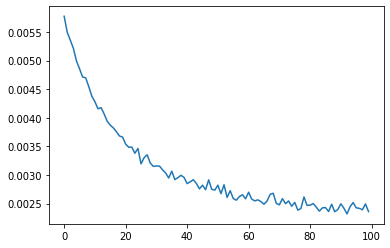

In [30]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])